In [27]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [28]:
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487764270.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487764729.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487767044.h5'

In [29]:
h = katdal.open(filename)

In [30]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487767044.h5 (version 3.0)
Observer: Moloko  Experiment ID: 20170222-0022
Description: 'Generic AR1 phaseup'
Observed from 2017-02-22 14:37:28.826 SAST to 2017-02-22 14:43:24.676 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m001,m003,m006,m010,m014,m025,m031,m034,m062  18      180
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M32k  1284.000         856.000          32768        26.123
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m003', 'm001', 'm014', 'm006', 'm062', 'm010', 'm034', 'm025', 'm031']
  spw=0
-------------------------------------------------------------------------------
Shape: (89 dumps, 32768 channels, 180 correlation products) => Size: 4.200 GB
An

In [31]:
# check what dynamic Telescope state keys we have
print h.file['TelescopeState'].keys()

[u'cbf_eq_coef_m006h', u'm025_rsc_rxs_serial_number', u'cbf_eq_coef_m003h', u'm062_activity', u'cal_preferred_refants', u'data_target', u'm062_rsc_rxl_serial_number', u'm031_rsc_rxl_serial_number', u'm001_pos_request_scan_elev', u'cal_param_kcross_chanave', u'cbf_eq_coef_d001h', u'm025_pos_request_scan_elev', u'm025_rsc_rxl_serial_number', u'anc_wind_direction', u'm025_pos_request_scan_azim', u'cbf_eq_coef_d003v', u'm034_ap_tilt_corr_azim', u'cbf_eq_coef_d006h', u'm025_pos_actual_scan_elev', u'm010_observer', u'm006_rsc_rxs_serial_number', u'cal_param_k_echan', u'm006_pos_actual_scan_elev', u'm006_rsc_rxx_serial_number', u'm062_rsc_rxu_serial_number', u'm001_ap_tilt_corr_elev', u'm003_dig_noise_diode', u'm014_pos_request_scan_elev', u'm003_rsc_rxu_serial_number', u'm010_ap_point_error_tiltmeter_enabled', u'cbf_eq_coef_m025h', u'm010_dig_noise_diode', u'cal_param_g_echan', u'cal_bls_ordering', u'm003_pos_request_scan_elev', u'm014_pos_request_scan_azim', u'm025_observer', u'cal_pol_orde

In [32]:
print h.file['TelescopeState']['cal_obs_end_time']

KeyError: "unable to open object (Symbol table: Can't open object)"

In [37]:
print h.file['TelescopeState']['m025_pos_request_scan_elev'][0][1]

F38.080152189000003
.


In [42]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_K  ---  1
    cal_product_G  ---  3


In [43]:
np.set_printoptions(precision=4,suppress=True)

In [44]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V123">
[['m001', 'm003', 'm006', 'm010', 'm014', 'm025', 'm031', 'm034', 'm062']]
['m001' 'm003' 'm006' 'm010' 'm014' 'm025' 'm031' 'm034' 'm062']


# Delays

In [45]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [46]:
k_array.shape #Times,Pols,Antennas

(1, 2, 9)

In [47]:
# print delays (if there are few delays)
print 'POL 0: ', k_0
print 'POL 1: ', k_1

POL 0:  [[ 28.0644 -50.7161 -27.7755  -0.      -4.4829  -3.179    6.2546   5.9162
  -18.6894]]
POL 1:  [[ 27.9799 -57.9254 -40.5839  -0.      -4.6894   9.456   18.7219  13.8662
  -18.6995]]


In [48]:
print labels

['m001' 'm003' 'm006' 'm010' 'm014' 'm025' 'm031' 'm034' 'm062']


In [49]:
k_0[:,0]

array([ 28.0644])

In [50]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

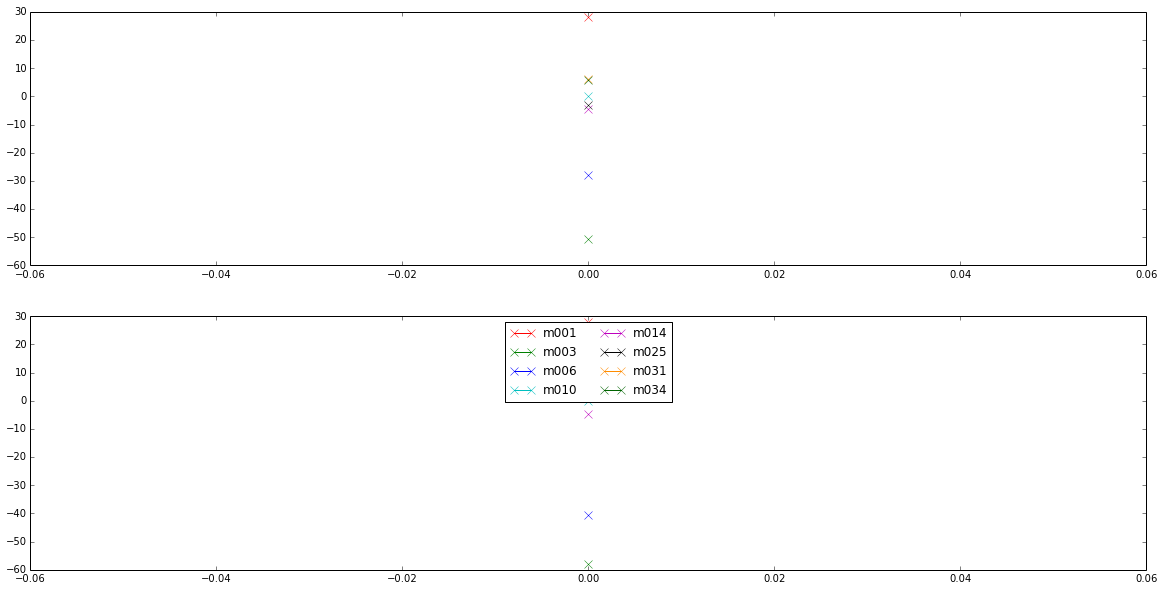

In [51]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)-1):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center',ncol=2)

# Gains

In [52]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(3, 2, 9)


In [53]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 5.9981  1.4681  7.7276  5.9833  6.2851  1.9781  2.2943  0.4606  6.6387]
[ 7.4628  0.6169  1.6806  6.5545  6.2852  6.4922  5.9484  6.1807  8.4922]


In [54]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 6.014   1.5619  7.7027  5.6962  6.2819  2.0396  2.3789  0.5122  6.6996]
[ 7.4718  0.6342  1.6931  6.5235  6.3142  6.5267  6.0155  6.2608  8.4567]


In [55]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 1.0027  1.0639  0.9968  0.952   0.9995  1.0311  1.0369  1.1122  1.0092]
[ 1.0012  1.0279  1.0075  0.9953  1.0046  1.0053  1.0113  1.013   0.9958]


In [56]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[ -33.8052    8.1789  -73.3772    0.      -73.4099  164.2143  148.191
  -74.1913  -85.4422]
[  28.1874  137.6779 -133.3918   -0.       42.5849  -69.7096  -31.3772
  -19.0185   31.2745]


In [57]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[ -39.2238    6.6279  -74.3168    0.      -74.6528  167.8556  147.5862
 -107.7247  -84.9842]
[  23.1773  127.5176 -135.3292    0.       40.2622  -71.1251  -37.1738
  -21.0948   30.6497]


In [58]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ -5.4186  -1.5509  -0.9397   0.      -1.2429   3.6412  -0.6048 -33.5334
   0.4579]
[ -5.0101 -10.1603  -1.9374   0.      -2.3227  -1.4156  -5.7966  -2.0764
  -0.6248]


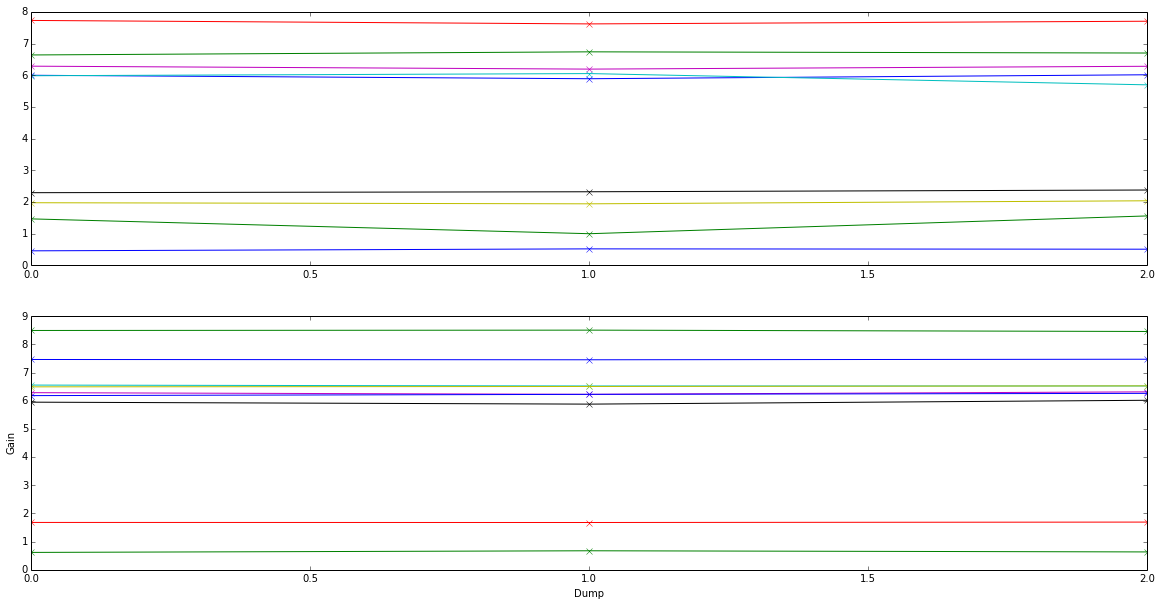

In [59]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
#plt.legend()

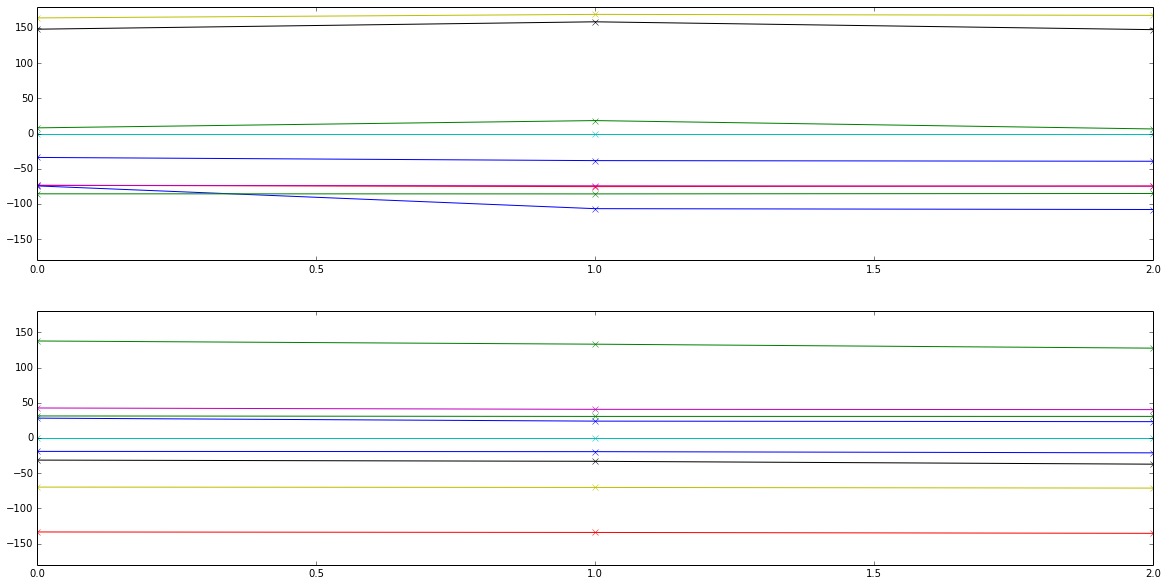

In [60]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

In [62]:
print  h.file['TelescopeState']['cal_param_g_bchan'][0][1]
print  h.file['TelescopeState']['cal_param_g_echan'][0][1]

print  h.file['TelescopeState']['cal_param_k_bchan'][0][1]
print  h.file['TelescopeState']['cal_param_k_echan'][0][1]

I17400
.
I21400
.
I17400
.
I21400
.


In [63]:
def freq(chan):
    bw=856.
    f=bw*chan/32768. +bw
    return(f)
    

In [64]:
print freq(17400), freq(21400)

1310.54101562 1415.03320312
